In [6]:
%matplotlib inline

In [7]:
def read_ascii_raster(ascii_raster_file):
    import numpy as np
    
    with open(ascii_raster_file) as f:
        header_data = [float(f.next().split()[1]) for x in xrange(6)] #read the first 6 lines
         
    raster_data = np.genfromtxt(ascii_raster_file, delimiter=' ', skip_header=6)
    raster_data = raster_data.reshape(header_data[1], header_data[0]) #rows, columns
    
    return raster_data, header_data

In [8]:
def cumulative_rainfall_catchment(hillshade_file, radar_data_totals):
    """
    Plots the catchment hillshade and overlays the total rainfalls accumulated
    during the model run.
    """
    label_size = 20
    #title_size = 30
    axis_size = 28

    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.colors as colors
    import matplotlib.cm as cmx
    from matplotlib import rcParams
    import matplotlib.lines as mpllines
    
    #get data
    #hillshade, hillshade_header = read_flt(hillshade_file)
    
    hillshade, hillshade_header = read_ascii_raster(hillshade_file)
    rainfall_totals = np.loadtxt(radar_data_totals)
    
    #ignore nodata values    
    hillshade = np.ma.masked_where(hillshade == -9999, hillshade)  
    
    m, n = hillshade.shape
    #print m, n
    i, j = rainfall_totals.shape
    
    scale_a = m/i
    scale_b = n/j
    
    #print scale_b, scale_b 
    #scaled_rainfall = np.kron(hillshade, rainfall_totals)
    scaled_rainfall = np.kron(rainfall_totals, np.ones((scale_a,scale_b)))    
    
    #fonts
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['arial']
    rcParams['font.size'] = label_size      
    
    fig = plt.figure(1, facecolor='white',figsize=(10,7.5))
    ax = fig.add_subplot(1,1,1)
    
    img1 = plt.imshow(hillshade, vmin=0, vmax=255, cmap=cmx.gray)
    img2 = plt.imshow(scaled_rainfall, interpolation="none", alpha=0.4)
    
    plt.show()

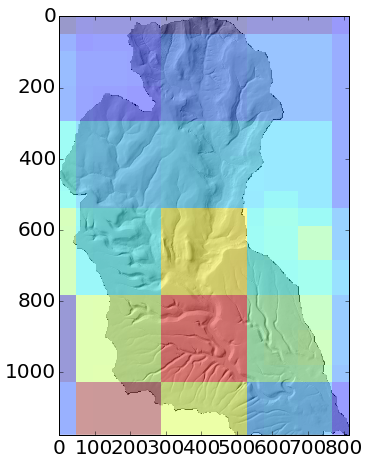

In [9]:
cumulative_rainfall_catchment("/home/dav/DATADRIVE/CODE_DEV/PyToolsPhD/Radardata_tools/RYEDALE_20m_fillcrop_HS.asc", \
    "/home/dav/DATADRIVE/CODE_DEV/PyToolsPhD/Radardata_tools/rainfall_totals_test.asc")   